Standard imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

/home/efefer/mysoftwares/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs( n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:,::-1]

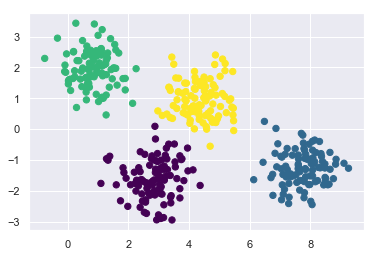

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(4,random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter( X[:,0], X[:,1], c=labels, s=40, cmap="viridis" )

In [25]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans( kmeans, X, n_clusters=4, rseed=0, ax=None ):
    labels = kmeans.fit_predict(X)
    
    ax = ax or plt.gca()
    ax.axis("equal")
    ax.scatter(X[:,0], X[:,1], c=labels, s=40, cmap="viridis", zorder=2)
    
    # plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc="#CCCCCC", lw=3, alpha=0.9, zorder=1))

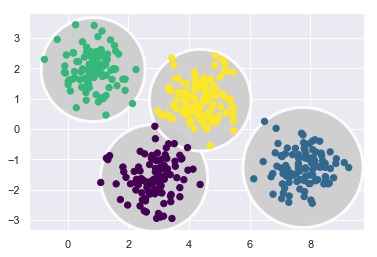

In [26]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

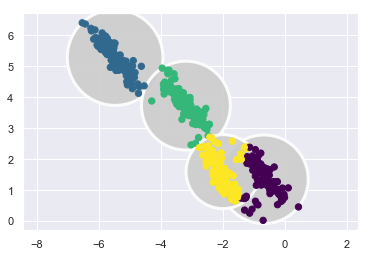

In [27]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2,2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

## Using GMM

In [28]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)

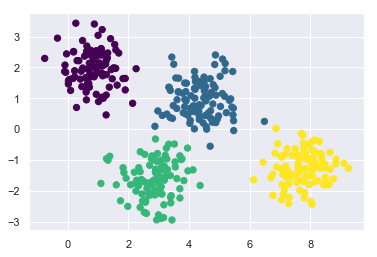

In [29]:
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap="viridis")

In [31]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.525 0.    0.475]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]]


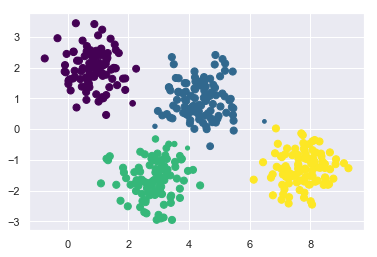

In [33]:
SIZE = 50*probs.max(1)**2
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=SIZE)

In [37]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    if covariance.shape == (2,2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0], U[0,0]))
        width, height = 2*np.sqrt(s)
    else:
        angle = 0.0
        width, height = 2*np.sqrt(covariance)
    
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position, nsig*width, nsig*height, angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:,0], X[:,1], c=labels, s=40, cmap="viridis", zorder=2)
    else:
        ax.scatter(X[:,0], X[:,1], s=40, zorder=2)
    
    ax.axis("equal")
    
    w_factor = 0.2/gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w*w_factor)

        

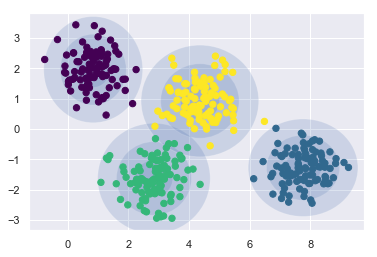

In [35]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

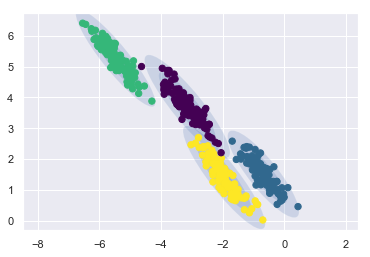

In [38]:
gmm = GMM(n_components=4, covariance_type="full", random_state=42)
plot_gmm(gmm, X_stretched)

## GMM as Density Estimation

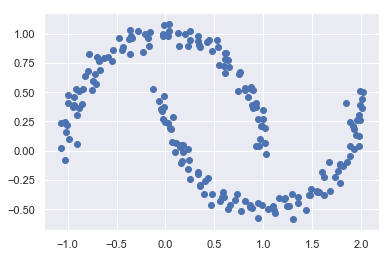

In [39]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)
plt.scatter(Xmoon[:,0], Xmoon[:,1])

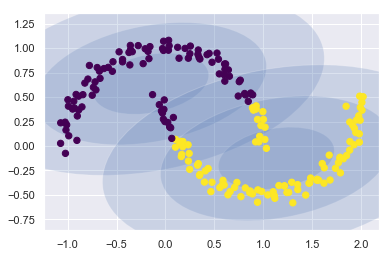

In [41]:
gmm2 = GMM(n_components=2, covariance_type="full", random_state=0)
plot_gmm(gmm2, Xmoon)

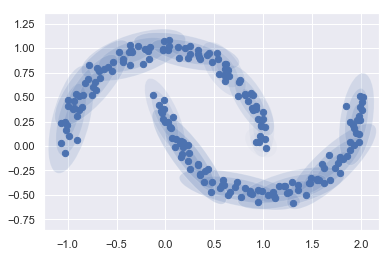

In [43]:
gmm16 = GMM(n_components=16, covariance_type="full", random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

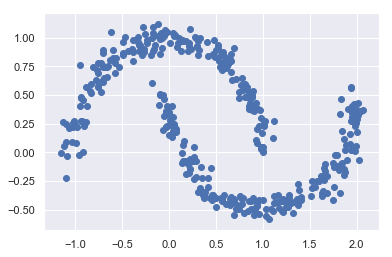

In [44]:
Xnew = gmm16.sample(400, random_state=42)
plt.scatter(Xnew[:,0], Xnew[:,1])

GMM is convenient as a flexible means of modeling an arbitrary multidimensional distribution of data.

Akaike information criterion (AIC) and Bayesian information criterion (BIC)

In [45]:
n_components = np.arange(1,21)
models = [GMM(n, covariance_type="full", random_state=0).fit(Xmoon) for n in n_components]

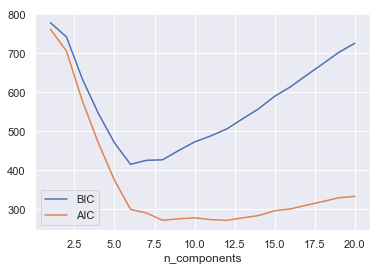

In [47]:
plt.plot(n_components, [m.bic(Xmoon) for m in models], label="BIC")
plt.plot(n_components, [m.aic(Xmoon) for m in models], label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components");